<a href="https://colab.research.google.com/github/Faig22/Media_Campaign_Cost_prediction/blob/main/Media_Campaign_Cost_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn-bright')
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

## Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

with ZipFile("drive/MyDrive/Machine Learning projects/Playground Series/Season 3, Episode 11/playground-series-s3e11.zip") as myzip:
    train = myzip.open("train.csv")
    test = myzip.open("test.csv")
    submission = myzip.open("sample_submission.csv")
train = pd.read_csv(train)
test = pd.read_csv(test)
submission = pd.read_csv(submission)

In [ ]:
train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [ ]:
test.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
submission.head()

,id,cost
0,360336,99.615
1,360337,99.615
2,360338,99.615
3,360339,99.615
4,360340,99.615


## EDA

In [ ]:
train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

In [ ]:
print(f'train shape {train.shape}')
print(f'test shape {test.shape}')

train shape (360336, 16)
test shape (240224, 15)


### Функции для визуализации данных

Реализуем функцию для визуализации распределения категориальных и количественных признаков

In [ ]:
def distribution_view(df, features: list, NROWS: int, NCOLS: int, MODE: str):
    
    fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(18,10))
    
    
    for i in range(NCOLS):
        for j in range(NROWS):
            if MODE == 'cont':
                sns.kdeplot(data=df, x=df[features[NCOLS*j+i]],
                            ax=ax[j,i], fill=True,
                            color=color_pal[0])

            elif MODE == 'cat':
                sns.countplot(data=df, x=df[features[5*j+i]],
                              ax=ax[j,i])

            ax[j,i].set_ylabel('')
            ax[j,i].tick_params(labelsize=5, width=0.1) # масштабирует подписи на осях
    
    if MODE == 'cont':   
        fig.suptitle('Распределение количественных признаков')
    
    elif MODE == 'cat':  
        fig.suptitle('Распределение категориальных признаков')
    
    return
            



### Missing values

In [ ]:
missing_train = (train.isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_train

Series([], dtype: float64)

In [ ]:
missing_test = (test.isnull().sum() / test.shape[0] * 100).sort_values(ascending=False)
missing_test = missing_test[missing_test > 0]
missing_test

Series([], dtype: float64)

Пропусков нет 

### Continuos and Categorical Data Distribution

По среднестатистическому отклонению можно предположить, какие данные категориальные, какие количественные

In [ ]:
train.describe().T.sort_values(by='std', ascending=False) \
                .style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
store_sqft,360336.000000,28180.333442,5968.874074,20319.000000,23593.000000,27694.000000,33858.000000,39696.000000
cost,360336.000000,99.614729,29.939435,50.790000,70.320000,98.810000,126.620000,149.750000
units_per_case,360336.000000,18.972706,10.212912,1.000000,10.000000,20.000000,28.000000,36.000000
gross_weight,360336.000000,13.822071,4.614792,6.000000,9.710000,13.600000,17.700000,21.900000
store_sales(in millions),360336.000000,6.337376,3.307980,0.510000,3.720000,5.780000,8.400000,22.920000
total_children,360336.000000,2.456482,1.488992,0.000000,1.000000,2.000000,4.000000,5.000000
num_children_at_home,360336.000000,0.689390,1.214732,0.000000,0.000000,0.000000,1.000000,5.000000
avg_cars_at home(approx).1,360336.000000,2.203813,1.084293,0.000000,1.000000,2.000000,3.000000,4.000000
unit_sales(in millions),360336.000000,3.043881,0.784676,1.000000,3.000000,3.000000,4.000000,6.000000
florist,360336.000000,0.503191,0.499991,0.000000,0.000000,1.000000,1.000000,1.000000


Наша задача — разработать модель машинного обучения, которая поможет нам прогнозировать стоимость медийных кампаний в продуктовых магазинах (колонку **cost**) на основе предоставленных признаков.

Посмотрим сколько уникальных значений в каждой колонке

In [ ]:
for col in train.columns:
    print(f'unique values in column {col} is {train[col].nunique()}')

unique values in column store_sales(in millions) is 1044
unique values in column unit_sales(in millions) is 6
unique values in column total_children is 6
unique values in column num_children_at_home is 6
unique values in column avg_cars_at home(approx).1 is 5
unique values in column gross_weight is 384
unique values in column recyclable_package is 2
unique values in column low_fat is 2
unique values in column units_per_case is 36
unique values in column store_sqft is 20
unique values in column coffee_bar is 2
unique values in column video_store is 2
unique values in column salad_bar is 2
unique values in column prepared_food is 2
unique values in column florist is 2
unique values in column cost is 328


Разделим признаки на категориальные и числовые, порогом послужит *10* уникальных значений в каждой колонке

Number of categorical features: 11
Number of continuous features: 4


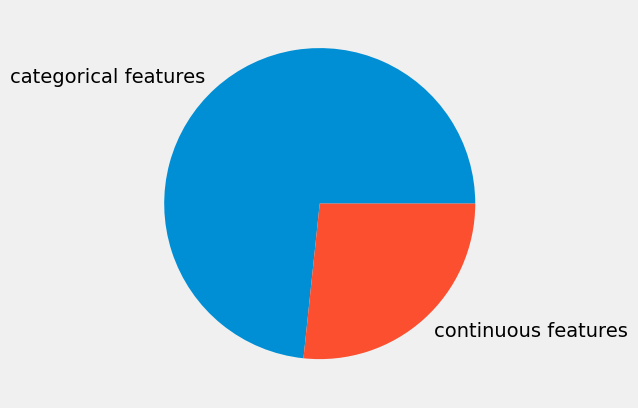

In [ ]:
THRESHOLD = 10
target = train.cost 
cat_features = [col for col in list(train.columns) if train[col].nunique() >= 2 and train[col].nunique() < THRESHOLD]
cont_features = [col for col in list(train.columns) if train[col].nunique() >= THRESHOLD and col != 'cost']

print(f'Number of categorical features: {len(cat_features)}')
print(f'Number of continuous features: {len(cont_features)}')

plt.pie(x=[len(cat_features), len(cont_features)],
        labels=['categorical features', 'continuous features'])
plt.show()

Категориальных признаков вышло почти в два раза больше.

#### Feature Distribution of Continous Features

In [ ]:
cont_features

['store_sales(in millions)', 'gross_weight', 'units_per_case', 'store_sqft']

Построим графики распределения количественных и категориальных признаков с помощью функции ***distribution_view***, которую я задал чуть выше

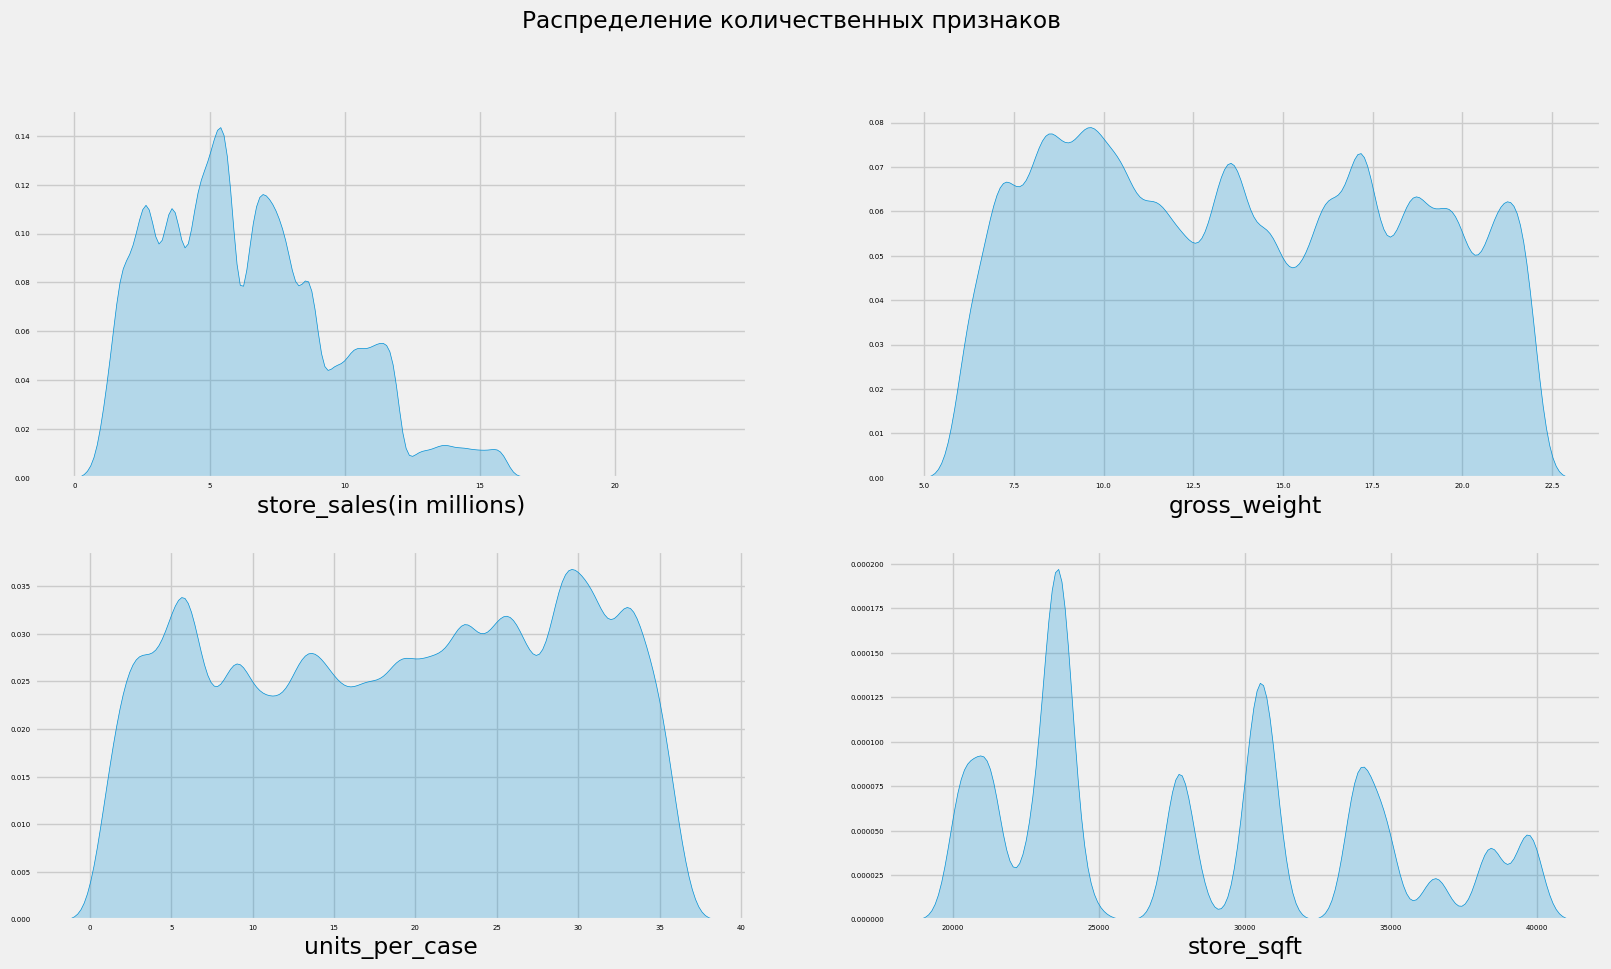

In [ ]:
distribution_view(train, cont_features, 2, 2, 'cont')

**unuts_per_case** (Единицы товара, доступные на каждой полке магазина) и 
**gross_weight** (Вес брутто предмета) распределены равномерно

**store_sales(in millions)** имеет хвост справа, с которым нужно будет работать

**store_sqft** имеет больше дискретное распределение нежели непрерывное

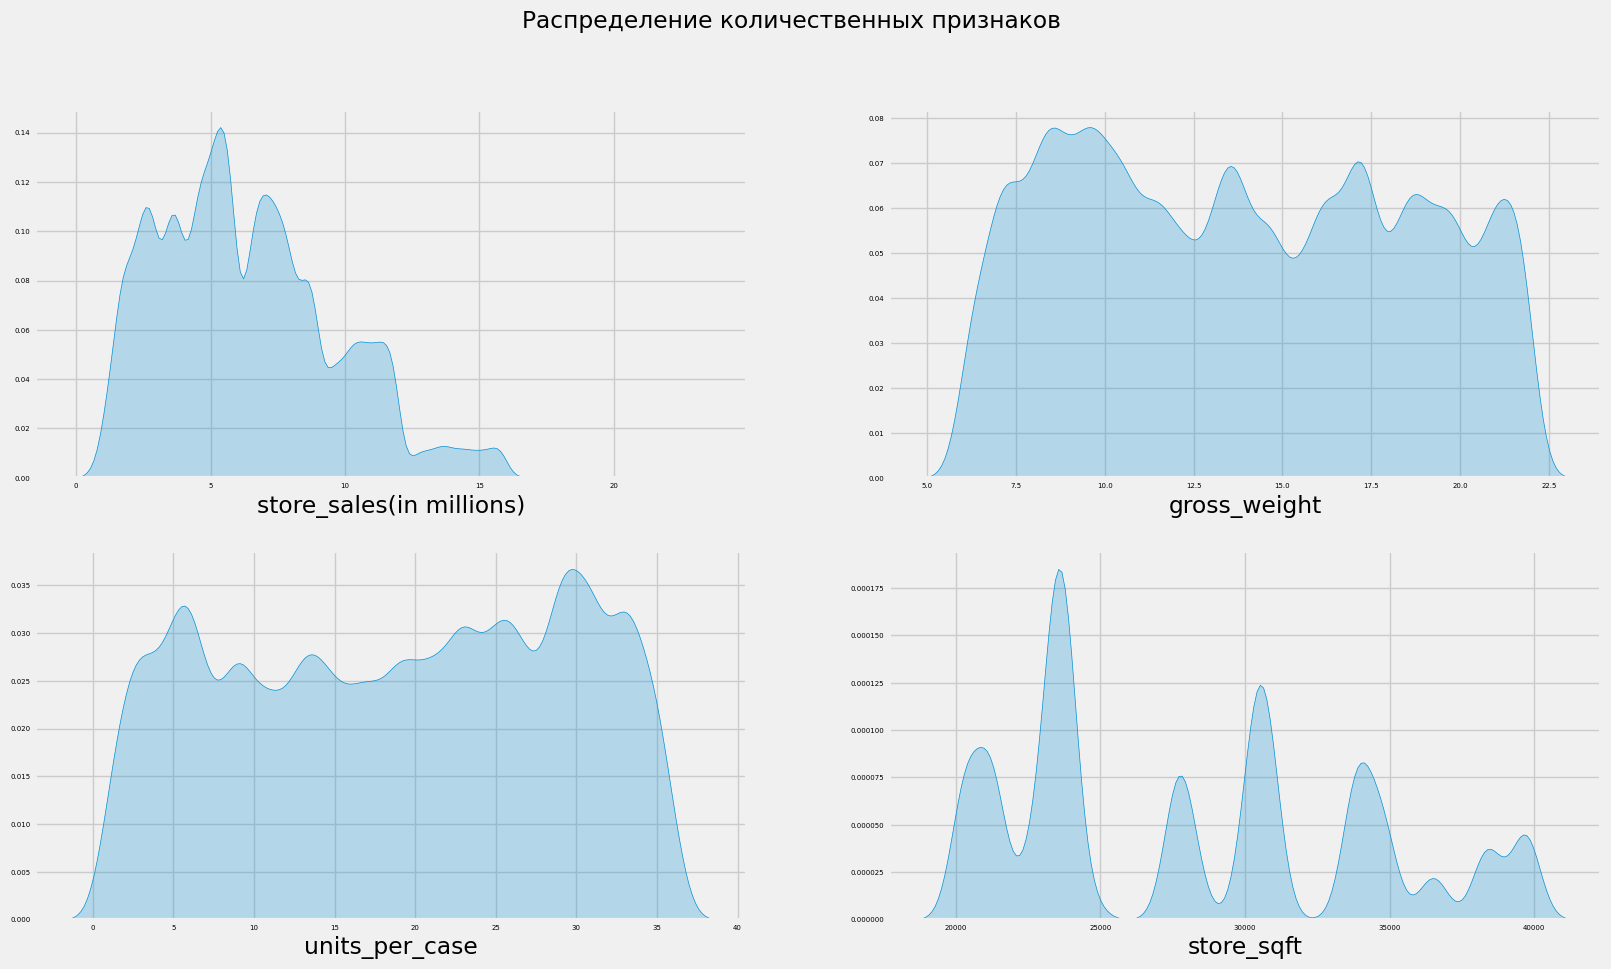

In [ ]:
distribution_view(test, cont_features, 2, 2, 'cont')


#### Feature Distribution of Categorical Features

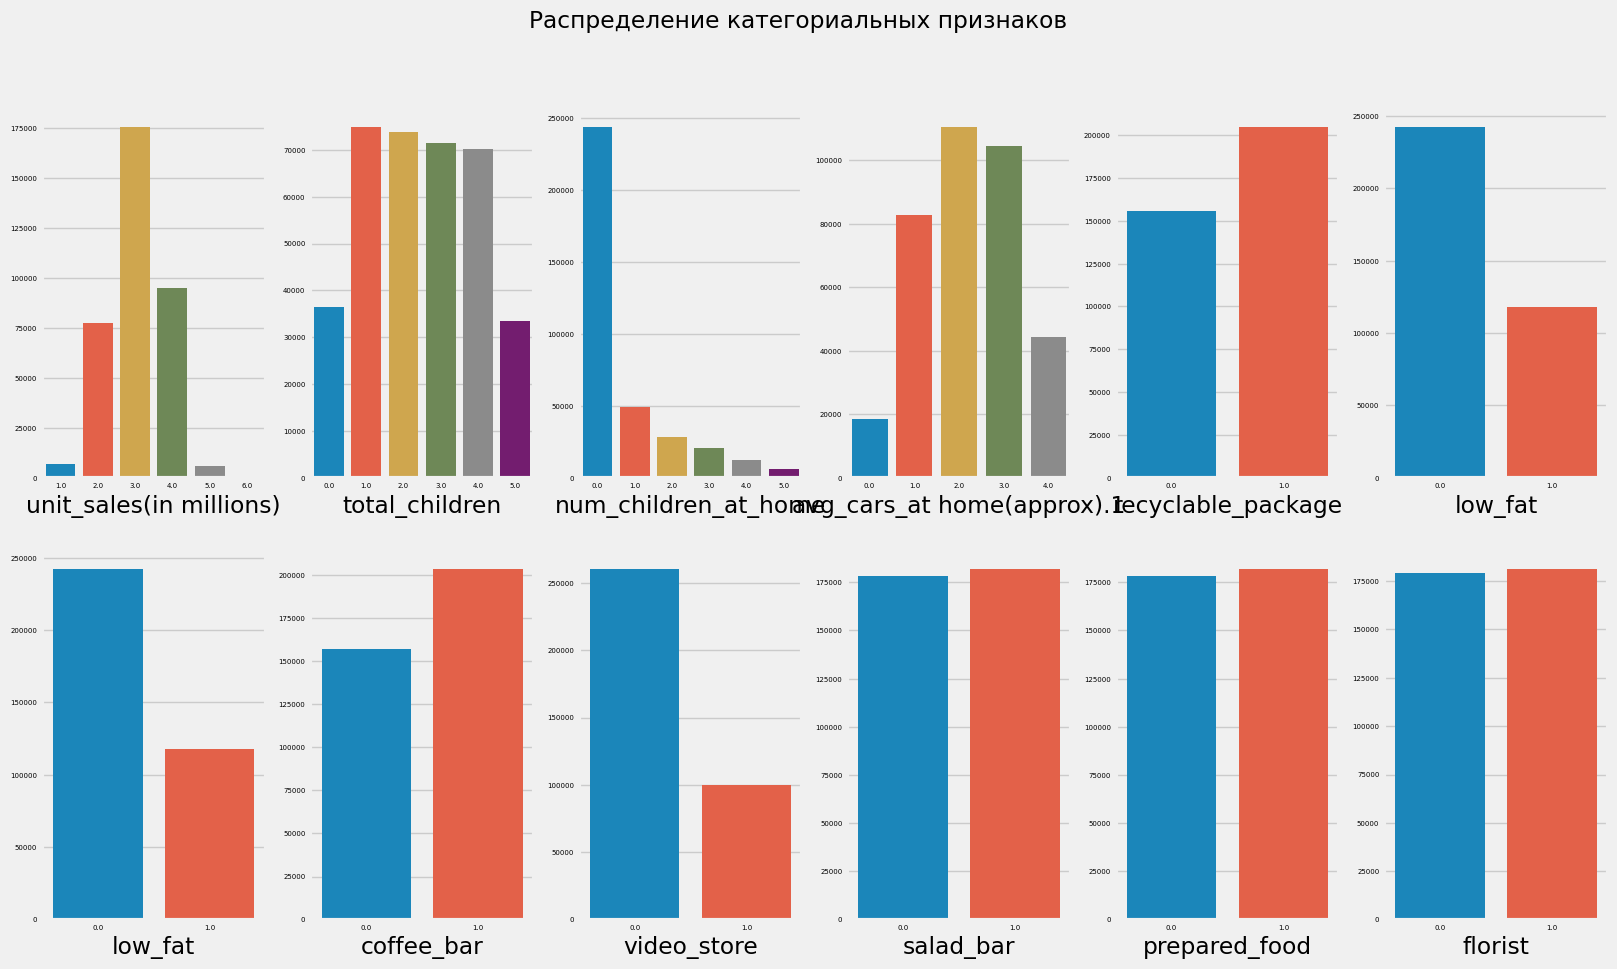

In [ ]:
distribution_view(train, cat_features, 2, 6, 'cat')

Большинство категорильных признаков - это бинарные признаки

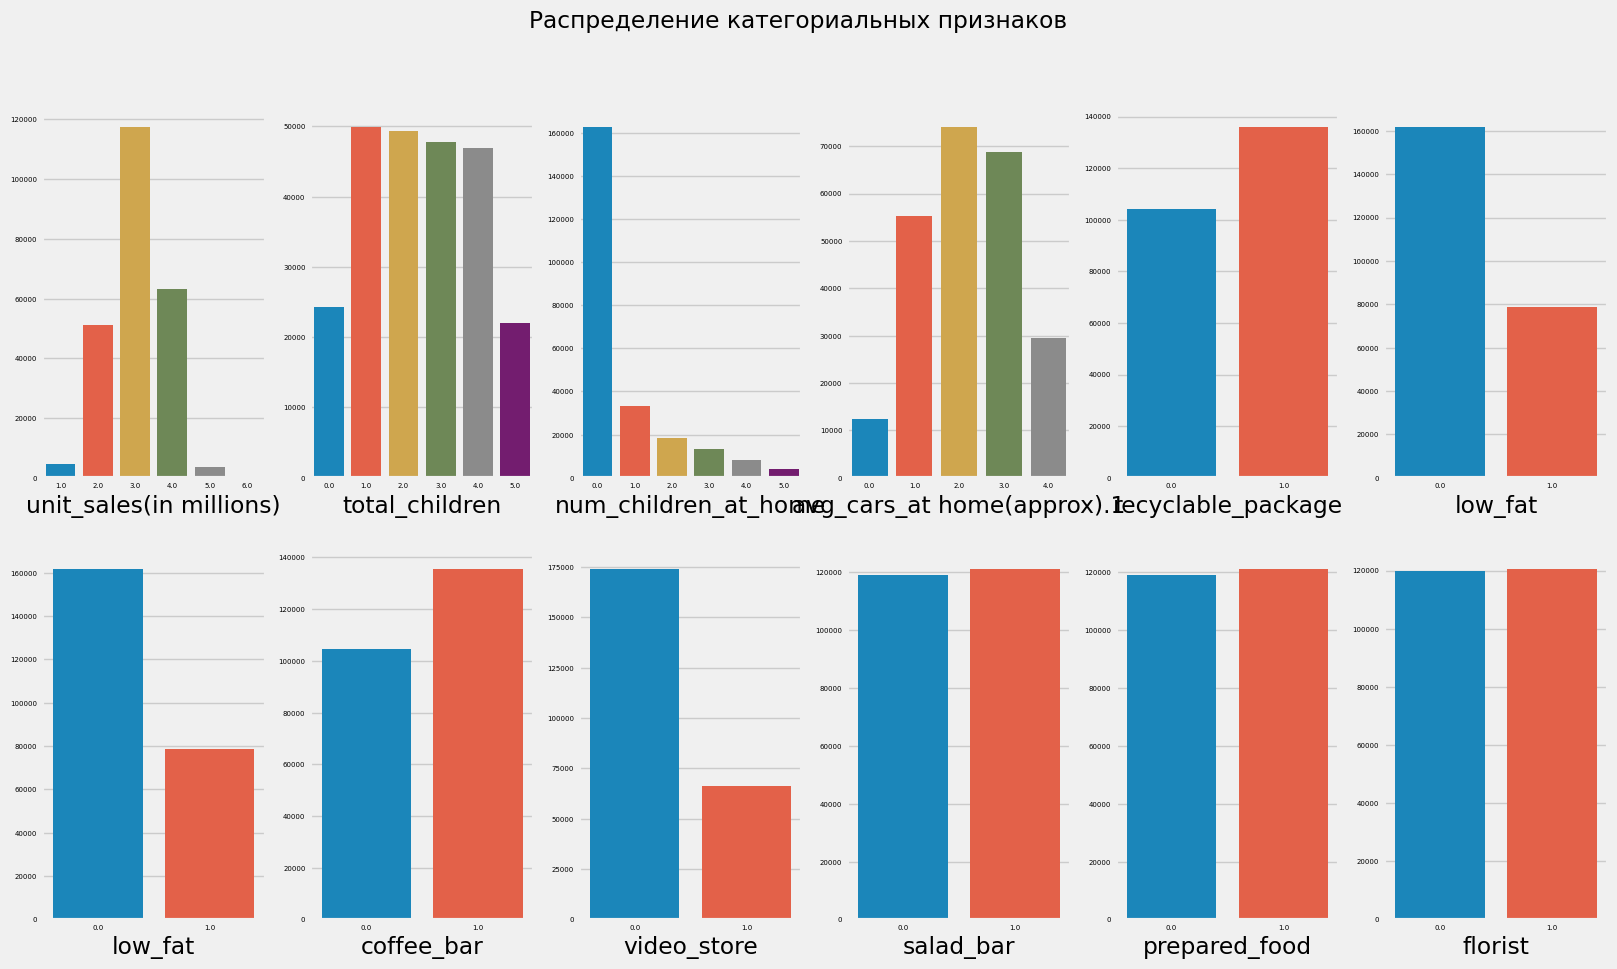

In [ ]:
distribution_view(test, cat_features, 2, 6, 'cat')


#### Target Distribution

Посмотрим на распределение целевой переменной **cost**

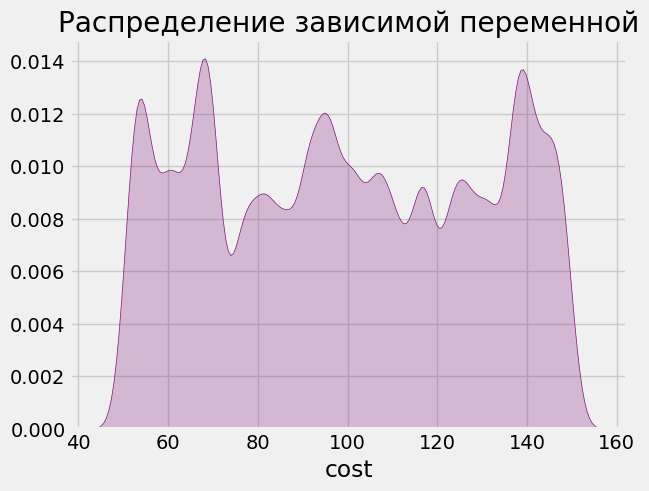

In [ ]:
ax = sns.kdeplot(data=train, x=train.cost, fill=True, color=color_pal[5])
ax.set_ylabel('')
ax.set_title('Распределение зависимой переменной')
plt.show()

### Data Cleaning and Processing

#### Correlation With All Features

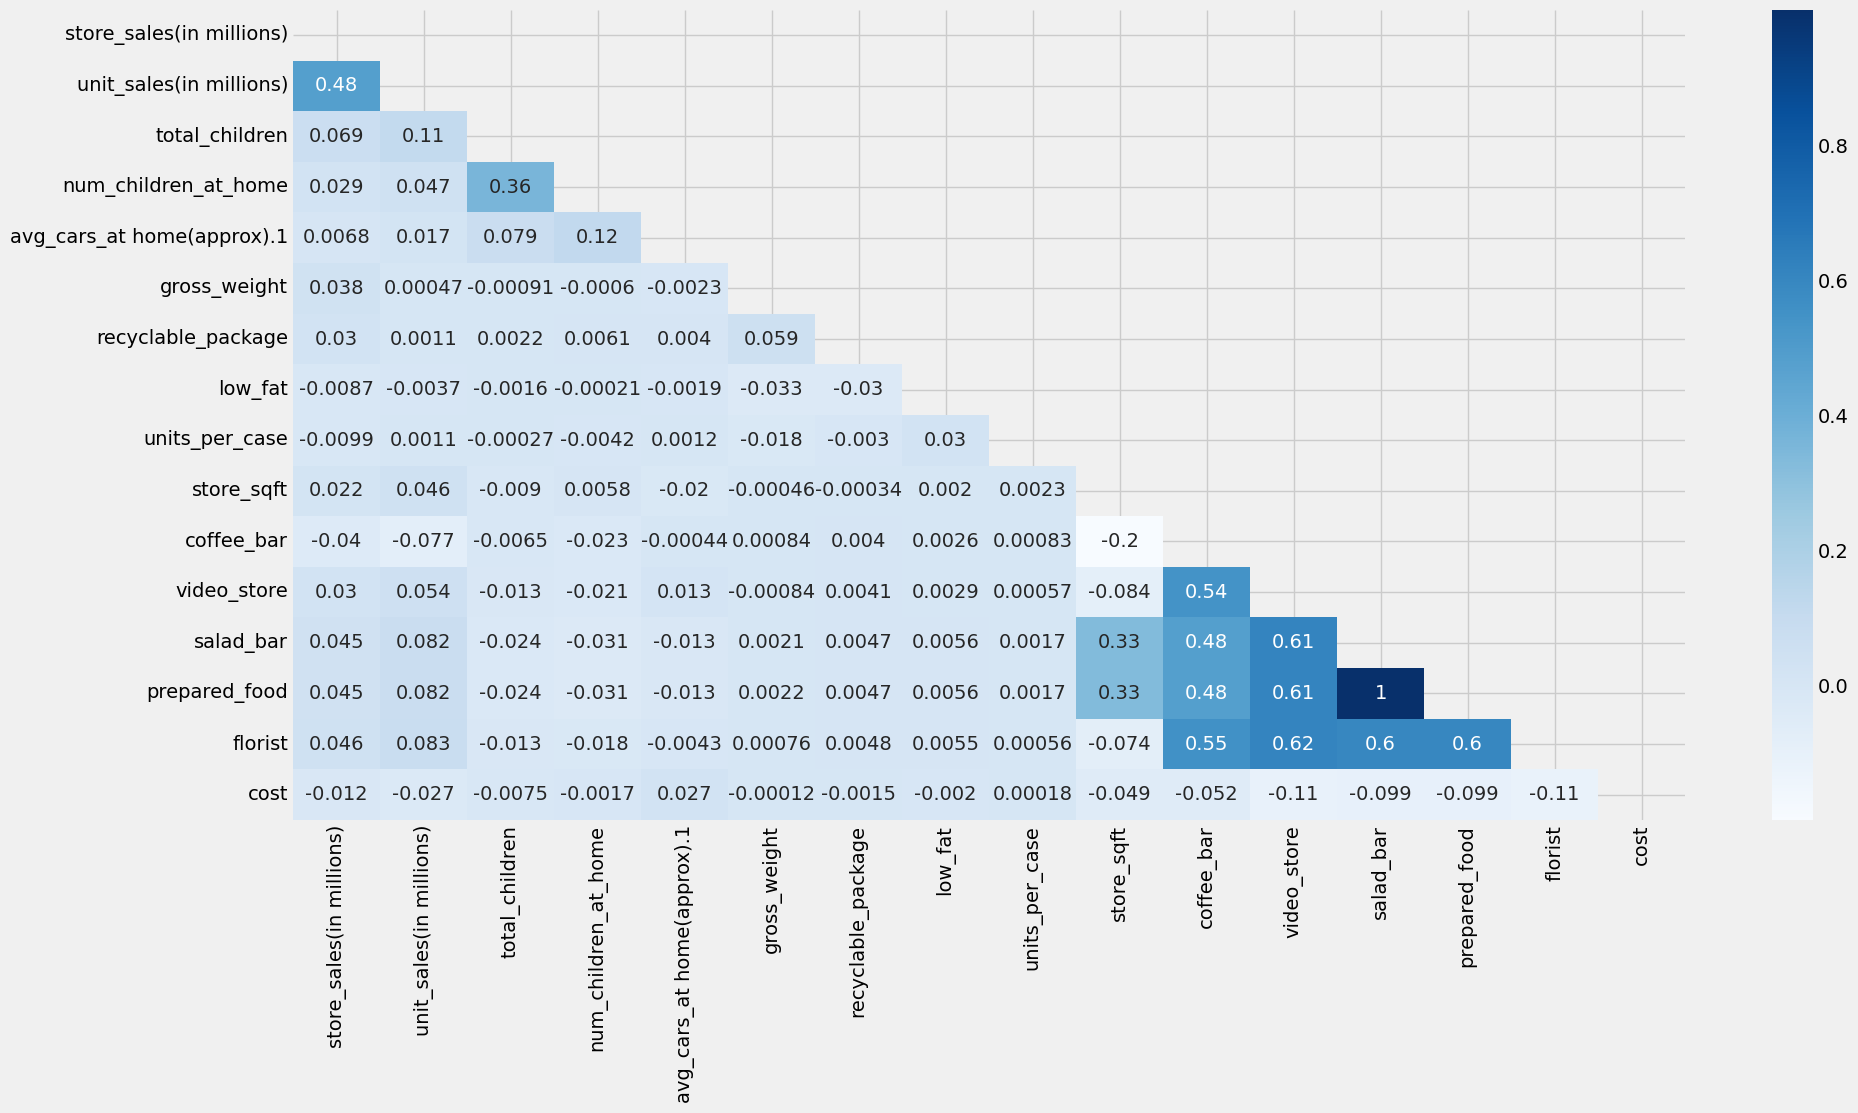

In [ ]:
plt.figure(figsize=(20,10))
corr_matrix = train.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True # Возвращает индексы для верхнего треугольника
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="Blues") # PiYG
plt.show()

Прямая линейная связь между **salad_bar** (есть ли в магазине бар с едой) и **prepared_food** (есть ли готовая еда в магазине). Поэтому удалим один из признаков для устранения мультиколлинеарности

Проверим данные на наличие дупликатов

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

Дупликатов нет

#### Adversarial Validation

Проверим насколько данные из трейна отличаются от тестовых

Мы обучим бинарный классификатор различать тренировочную и тестовую выборки, присваивая метку 0 тестовым выборкам и метку 1 обучающим выборкам. Если модель способна различать, то это означает, что обучающие и тестовые данные сильно отличаются друг от друга, а если нет, то они, вероятно, похожи, и обычные методы проверки должны работать.

In [ ]:
X_train = train.drop(columns='cost')
X_test = test.copy()

X_train['isTrain'] = 1
X_test['isTrain'] = 0

X = pd.concat([X_train, X_test], axis=0)

y = X['isTrain'].copy()
X = X.drop(columns='isTrain')



In [ ]:
# pip install catboost ### Раскоментить и выполнить 


In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import time

In [ ]:
N_folds = 5
RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=N_folds, shuffle=True, random_state=RANDOM_STATE)
xgb_params = {'learning_rate': 0.05,
               'objective': 'binary:logistic',
               'eval_metric': 'logloss',
               'n_estimators' : 1000,
               'max_depth': 4,
               'early_stopping_rounds':10,
               'seed': RANDOM_STATE}

xgb_class = XGBClassifier(**xgb_params)

In [ ]:
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):

        print(10 * '=', f'FOLD = {fold + 1}', 10 * '=')
        start_time = time.time()

        X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

        xgb_class.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)

        preds = xgb_class.predict_proba(X_valid)[:, 1]
        auc = roc_auc_score(y_valid, preds)
        
        run_time = time.time() - start_time
        print(f'FOLD = {fold}, ROC_AUC = {auc:.2f}, TIME = {run_time:.2f}s')

Мы видим, что валидационный показатель ***AUC*** для всех приведенных выше фолдов очень близок к *0,5*, т. е. непросто отличить обучающий набор данных от тестового. Это означает, что эти два набора данных статистически очень похожи и имеют одинаковое распределение признаков. Значит сюрпризов в тестовых данных не стоит ждать

#### Continuos Feature Processing

Отобразим парные зависимости между количсественными признаками

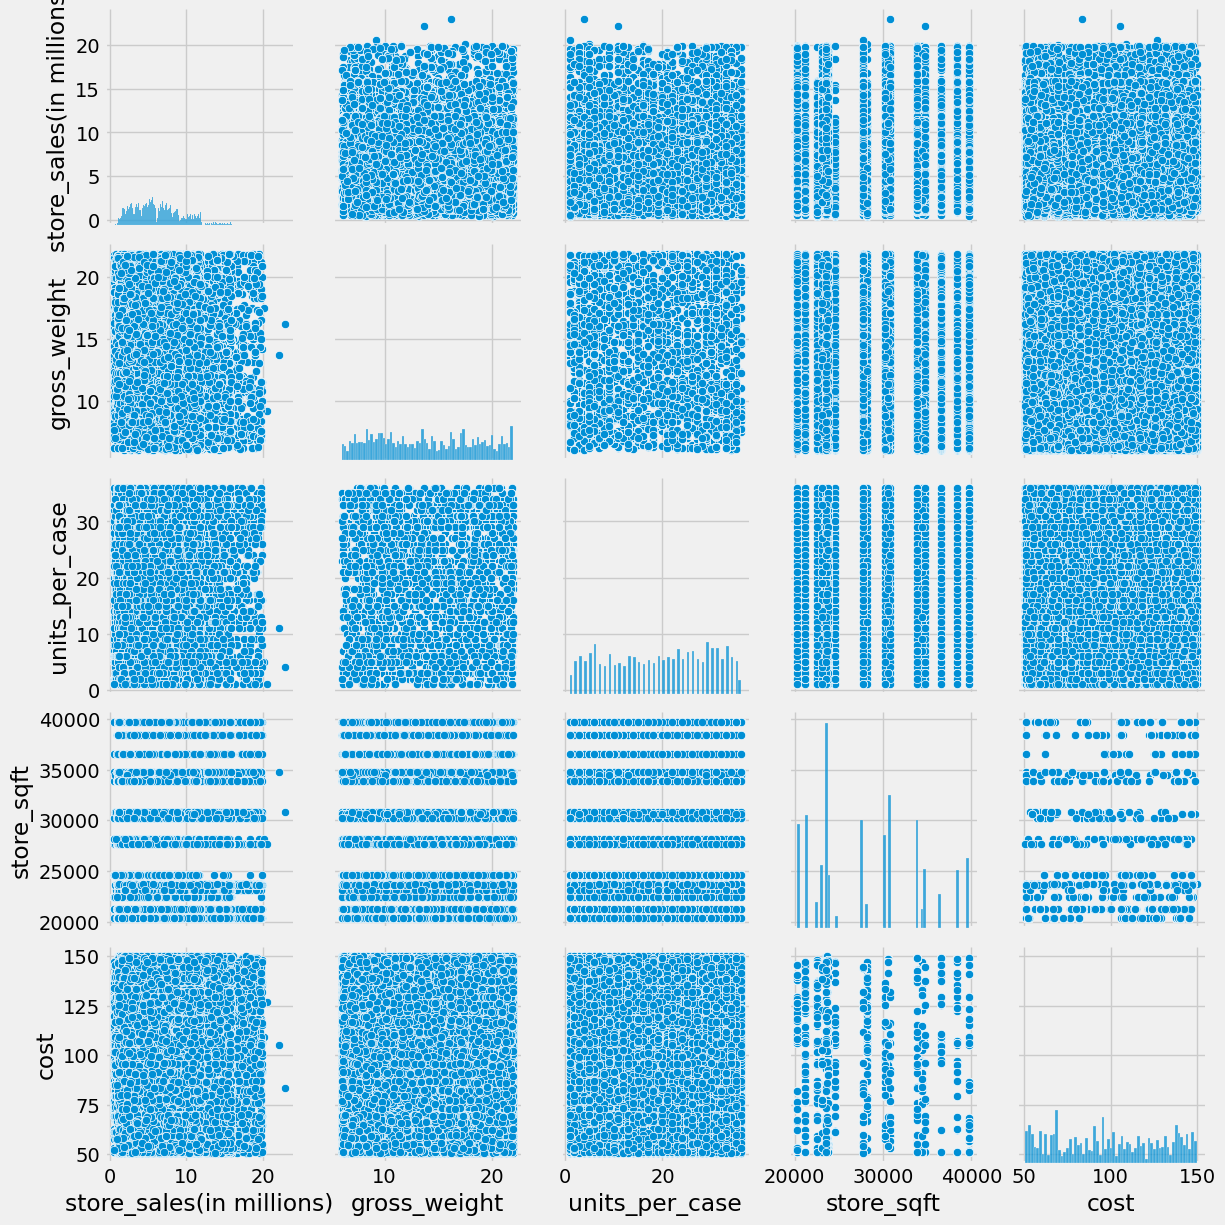

In [ ]:
pairplot_data = cont_features.copy()
pairplot_data.append('cost')

# plt.figure(figsize = (15,8))
sns.pairplot(data=train[pairplot_data])
plt.show()

Из интересного, **store_sqft** ведет себя как категориальный признак и в **store_sales(in millions)** присутствуют выбросы

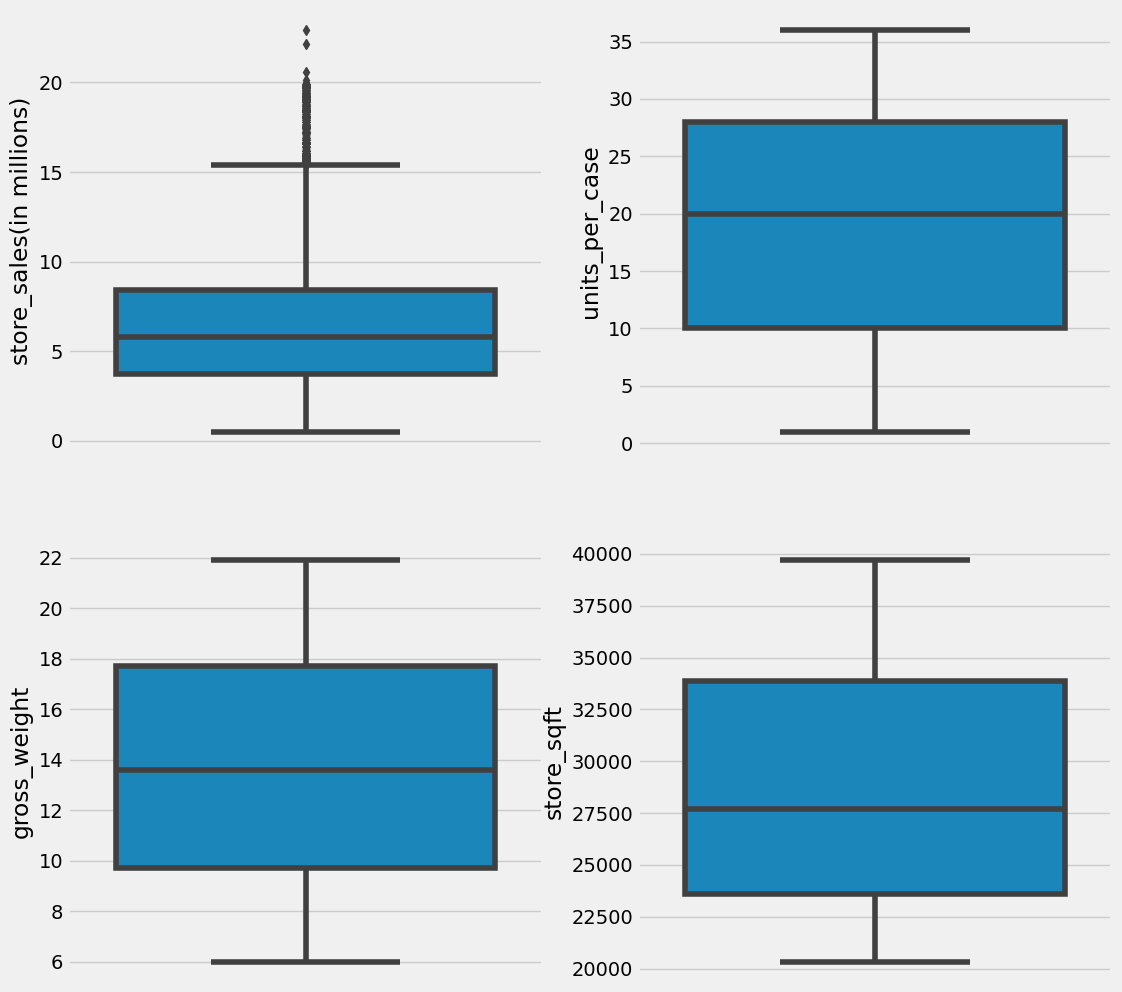

In [ ]:
NROWS = 2
NCOLS = 2
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(12, 12))

for i in range(NCOLS):
    for j in range(NROWS):

        sns.boxplot(y=train[cont_features[2*i+j]],
                    ax=ax[j, i], data = train)
        # ax[j, i].set_xlabel(f'{cont_features[2*i+j]}')


plt.show()

Выбросы присутствуют только в признаке **store_sales**

Посмотрим на тестовые данные 

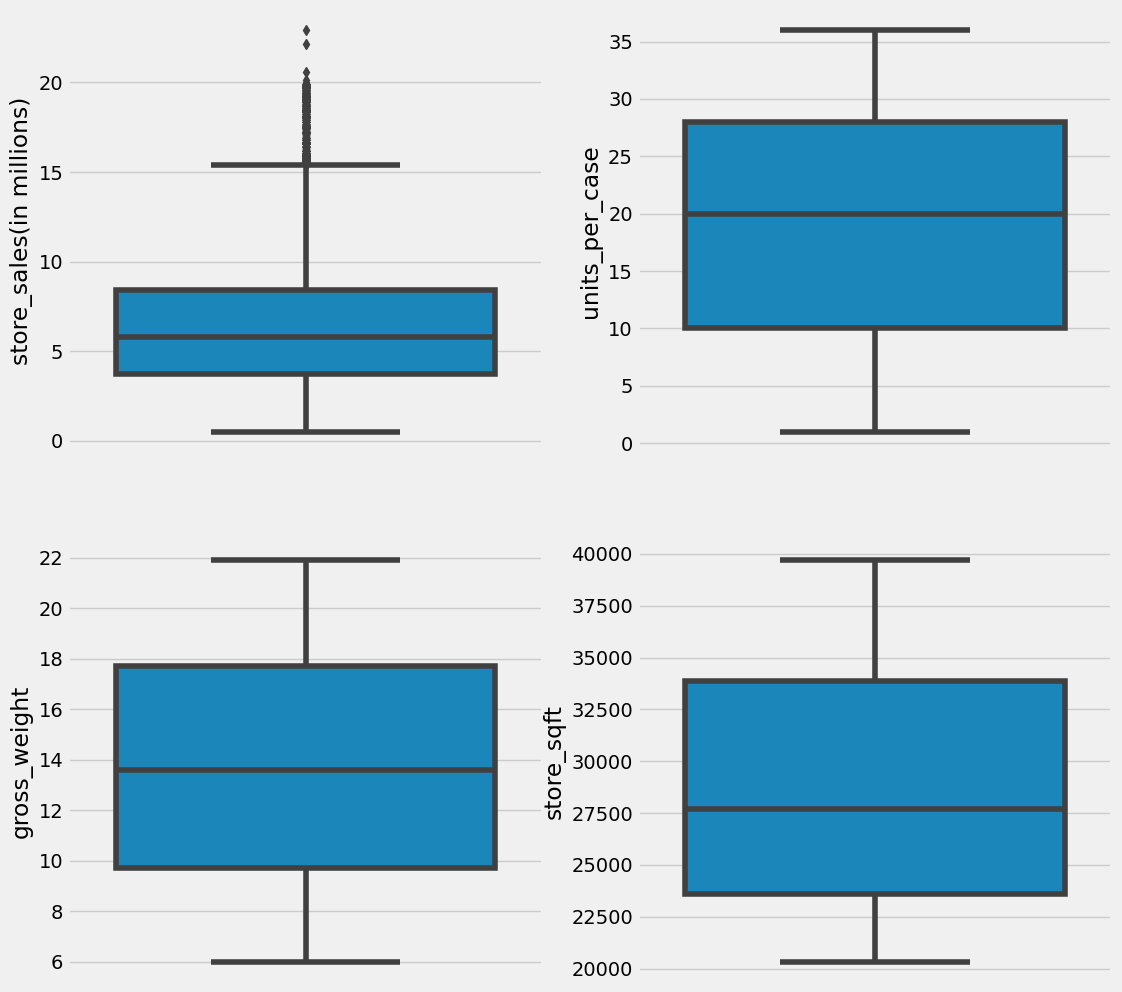

In [ ]:
NROWS = 2
NCOLS = 2
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(12, 12))

for i in range(NCOLS):
    for j in range(NROWS):

        sns.boxplot(y=train[cont_features[2*i+j]],
                    ax=ax[j, i], data = test)
        # ax[j, i].set_xlabel(f'{cont_features[2*i+j]}')


plt.show()

Аналогично

Выясним, сколько выбросов содержится в данных

In [ ]:
train[train['store_sales(in millions)'] > 16].shape[0]

892

Один из способов борьбы с выбросами это логарифмирование признака

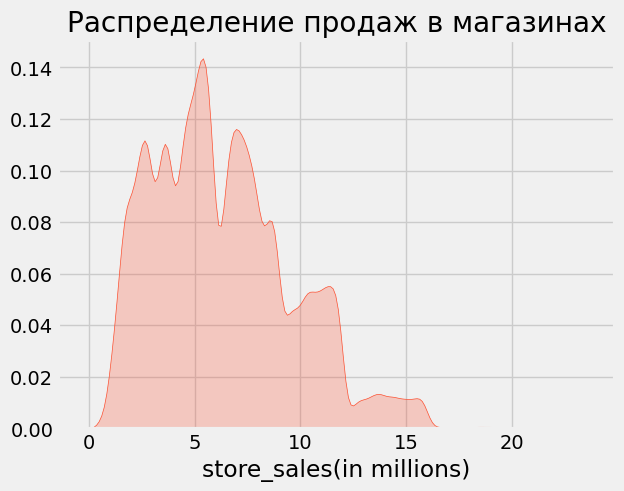

In [ ]:
ax = sns.kdeplot(data=train, x=train['store_sales(in millions)'], fill=True, color=color_pal[1])
ax.set_ylabel('')
ax.set_title('Распределение продаж в магазинах')
plt.show()

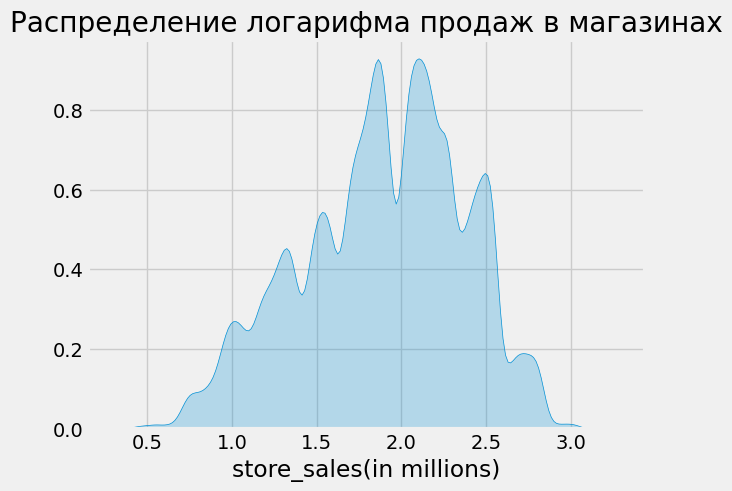

In [ ]:
ax = sns.kdeplot(data=train, x=np.log1p(train['store_sales(in millions)']), fill=True, color=color_pal[0])
ax.set_ylabel('')
# ax.set_xlabel('')
ax.set_title('Распределение логарифма продаж в магазинах')
plt.show()

Как видно из второго графика, признак стал более симметричным, хвост справа исчез. Поэтому преобразуем этот признак и будем в дальнейшем использовать логарифм

In [ ]:
train.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [ ]:
train['log_store_sales'] = np.log1p(train['store_sales(in millions)'])
test['log_store_sales'] = np.log1p(test['store_sales(in millions)'])

train.drop(columns='store_sales(in millions)', inplace=True)
test.drop(columns='store_sales(in millions)', inplace=True)

In [ ]:
cont_features.append('log_store_sales')
cont_features.remove('store_sales(in millions)')
cont_features

['gross_weight', 'units_per_case', 'store_sqft', 'log_store_sales']

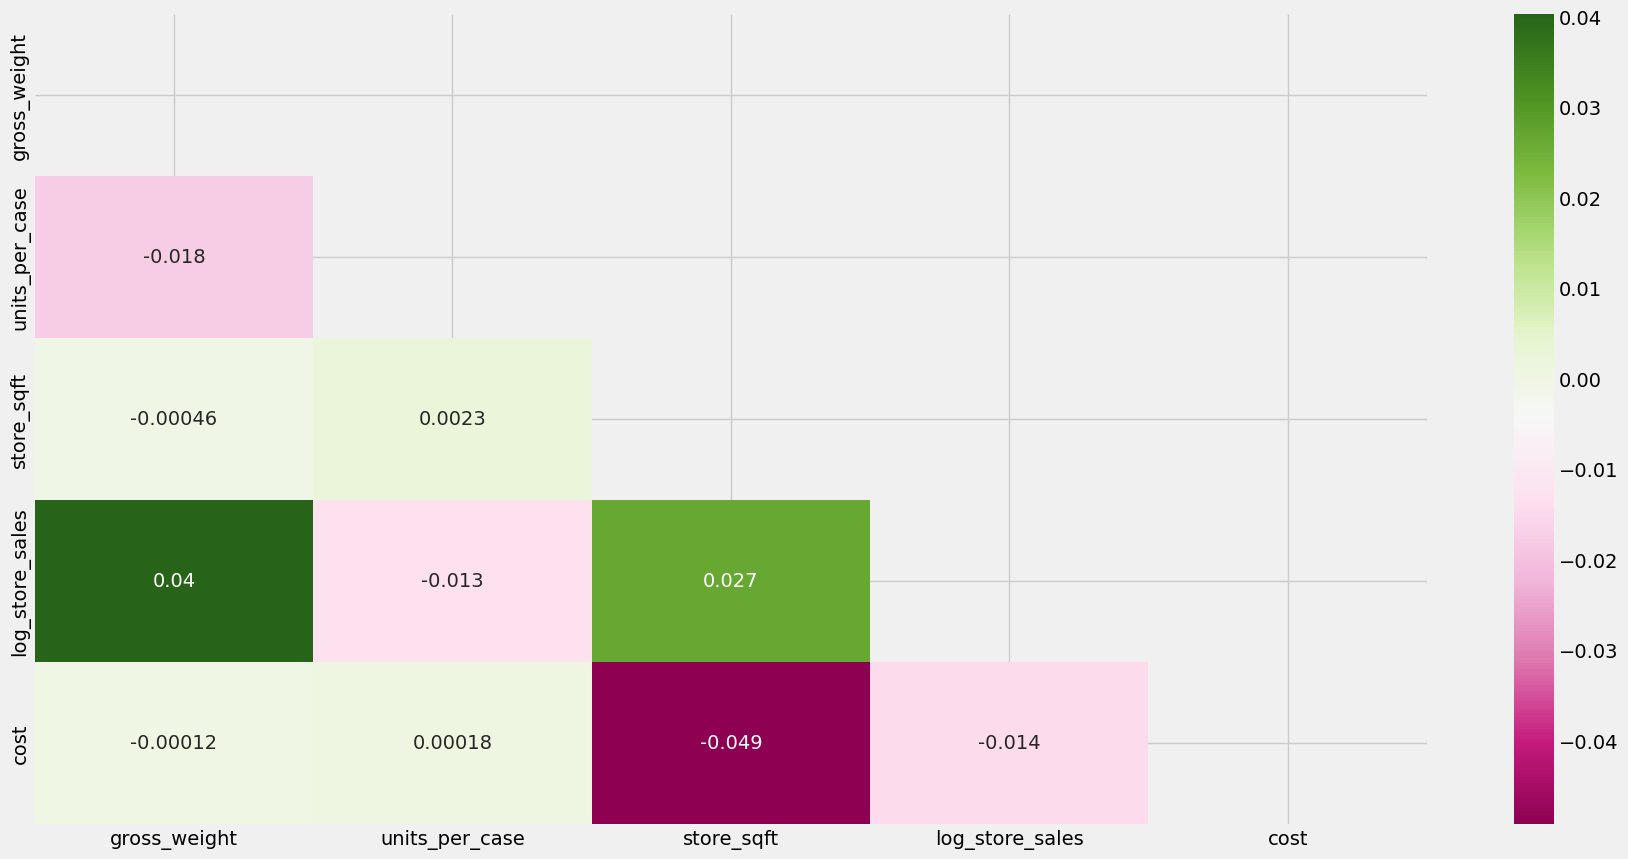

In [ ]:
corr_data = cont_features.copy()
corr_data.append('cost')


plt.figure(figsize=(20,10))

corr_matrix = train[corr_data].corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True # Возвращает индексы для верхнего треугольника

sns.heatmap(corr_matrix, mask = mask, annot=True, cmap="PiYG") # PiYG
# plt.title('Корреляционная матрица')
plt.show()

Линейных зависимостей между количественными признаками нет

#### Categorical Feature Processing

In [ ]:
cat_features

['unit_sales(in millions)',
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist']

Построим графики распределения таргета (**boxplot**) в зависимости от категориальных признаков 

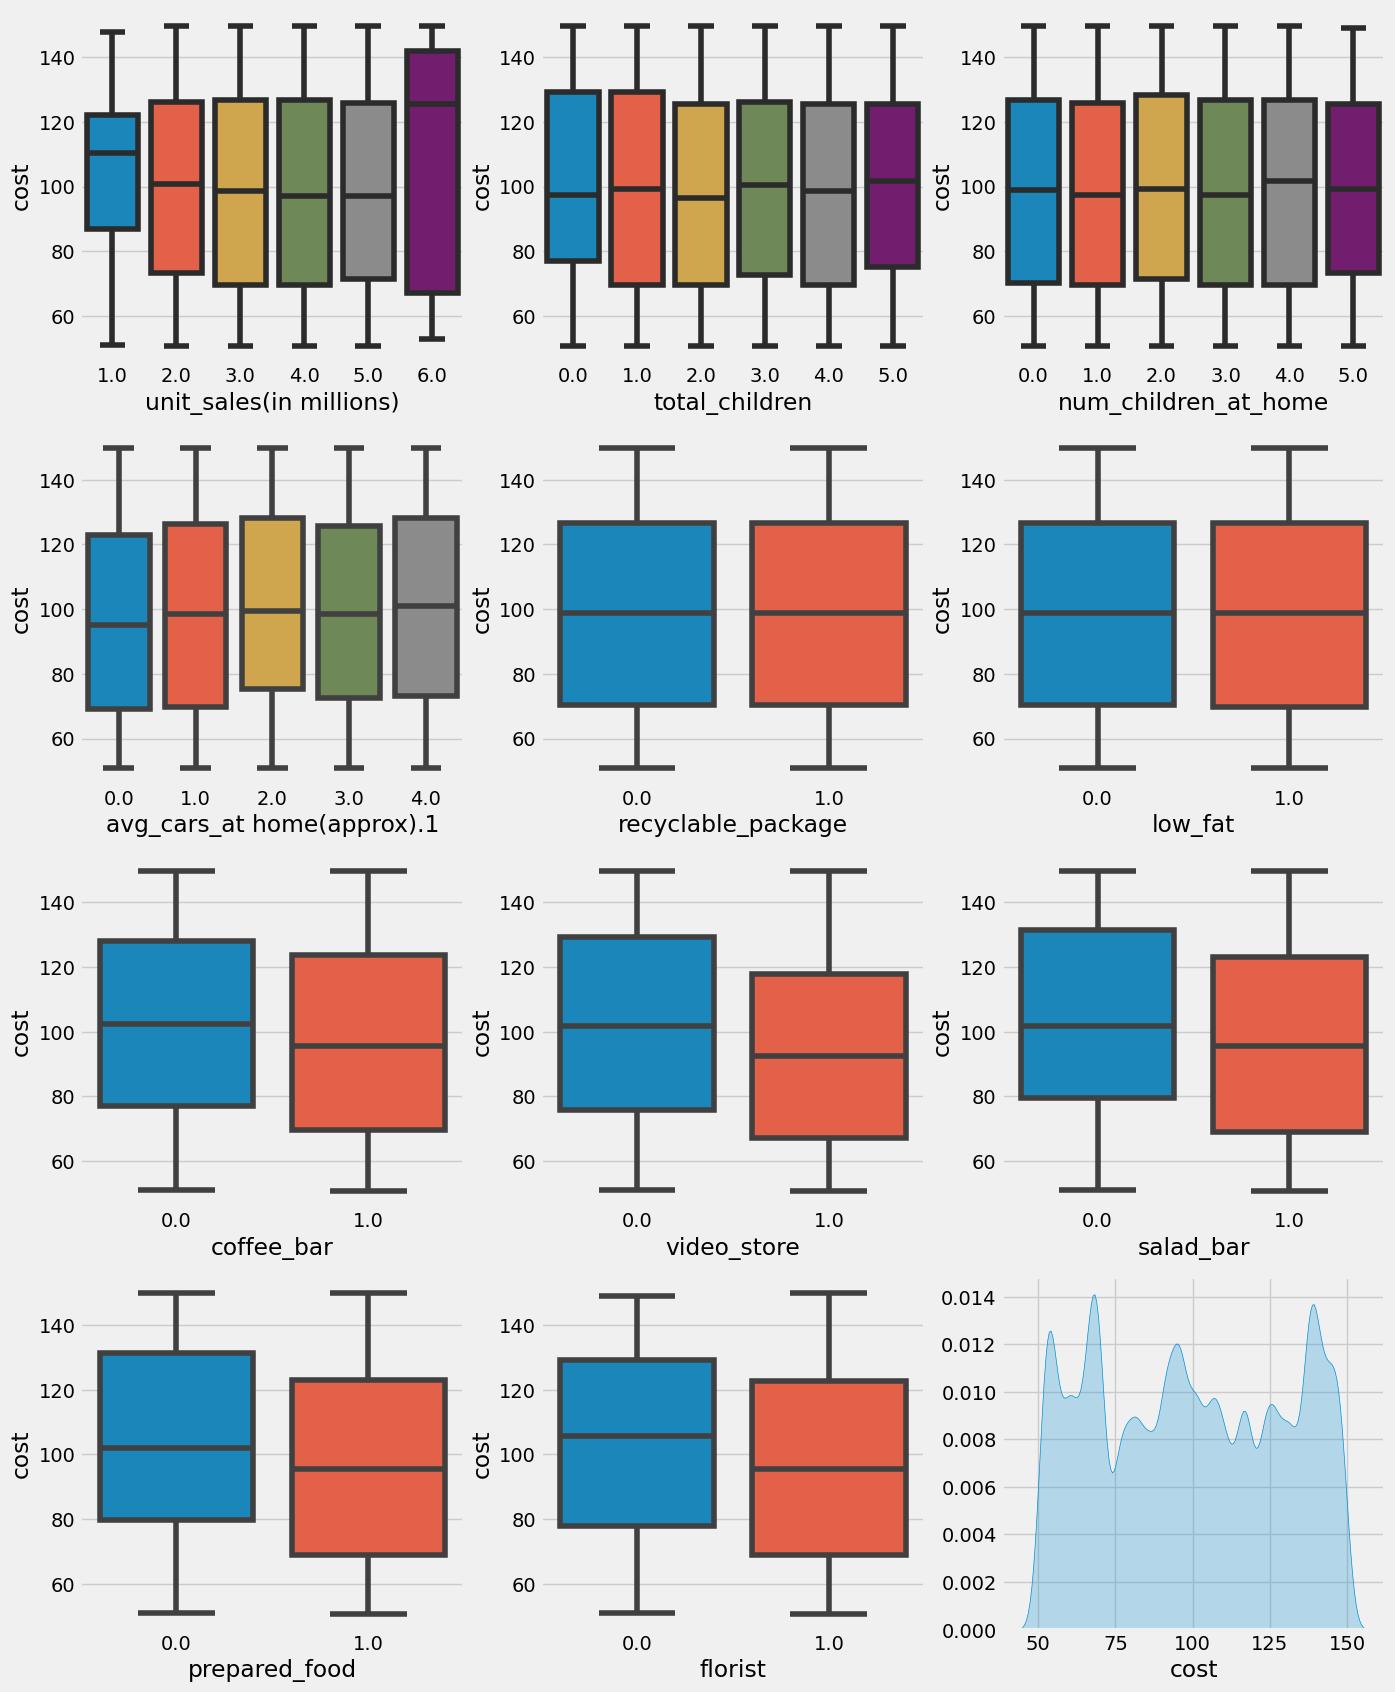

In [ ]:
NROWS = 4
NCOLS = 3

fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(15,20))
for i in range(NCOLS):
    for j in range(NROWS):
        try:
            sns.boxplot(x=train[cat_features[NCOLS*j+i]], y='cost',
                        ax=ax[j,i], data=train)
        except IndexError:
            sns.kdeplot(data=train, x='cost',
                        fill=True, color=color_pal[0], ax=ax[j,i])
            ax[j,i].set_ylabel('')
# plt.tight_layout()
plt.show()

 Когда единицы продаж (в миллионах) в магазинах (**unit_sales(in millions)**) достигают 1 млн или 6 млн, то возрастает стоимость привлечения клиентов

Признаки **recyclable_package** (Находится ли пищевой продукт в перерабатываемой упаковке или нет), **low_fat** (Является ли продукт питания обезжиренным или нет) не играют никакой роли в распределении таргета **cost**

In [ ]:
cont_features.append('cost')

In [ ]:
train['unit_sales(in millions)'].value_counts()

3.0    175556
4.0     94999
2.0     77240
1.0      6765
5.0      5745
6.0        31
Name: unit_sales(in millions), dtype: int64

In [ ]:
train.groupby('unit_sales(in millions)')[cont_features].agg('mean') \
                                                       .sort_values(by='cost', ascending=False)

,gross_weight,units_per_case,store_sqft,log_store_sales,cost
unit_sales(in millions),,,,,
6.0,14.548387,16.838710,28431.129032,2.481257,107.233226
1.0,13.709157,18.611678,25125.852624,1.107043,105.849193
2.0,13.802625,19.036885,27898.470624,1.576843,100.492636
3.0,13.847483,18.942315,28339.728759,1.905175,99.378377
4.0,13.801569,18.995958,28339.842125,2.127330,98.935700
5.0,13.775020,19.090688,28056.904787,2.362923,98.879890


Такие высокие показатели при *6* млн единиц продаж в первую очередь связаны с малым количеством таких продаж, всего *31*, поэтому считать это киллер фичей я бы не стал

Посмотрим на сводную таблицу без *6* млн единиц продаж продукции

Между **unit_sales(in millions)** и **cost** наблюдается отрицательная линейная связь

<Figure size 640x480 with 0 Axes>

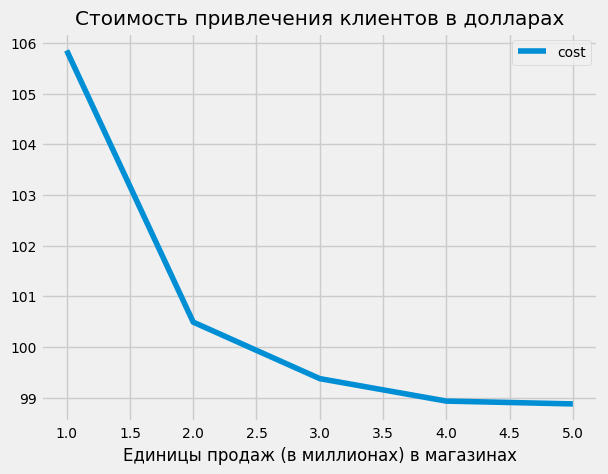

In [ ]:
plt.figure()
plt.rcParams.update({'font.size': 10})

ax = train[train['unit_sales(in millions)'] != 6].groupby('unit_sales(in millions)')[['cost']] \
                                            .agg('mean') \
                                            .plot(title='Стоимость привлечения клиентов в долларах')
ax.set_xlabel('Единицы продаж (в миллионах) в магазинах')

plt.show()

Интересно, как *6* млн продаж рушит эту отрицательную линейную связь. Как вариант, это может быть выбросом, однако положительная линейная связь со стоимостью продаж не пропадает. Вполне возможно наличие выбросов у **store_sales(in millions)** было отчасти обусловлено этими *6* млн кол-вом продаж продукции 

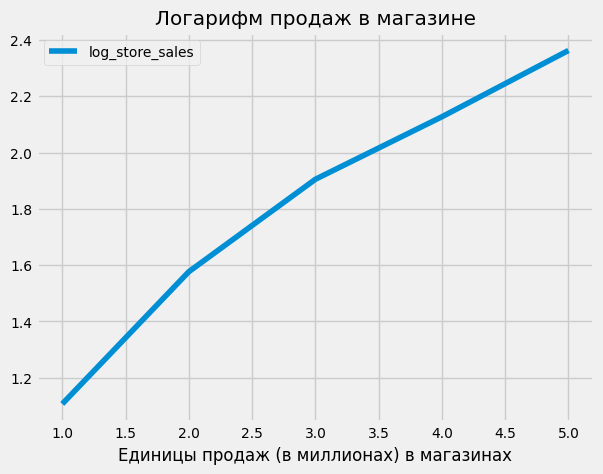

In [ ]:
ax = train[train['unit_sales(in millions)'] != 6].groupby('unit_sales(in millions)')[['log_store_sales']] \
                                            .agg('mean') \
                                            .plot(title='Логарифм продаж в магазине')
ax.set_xlabel('Единицы продаж (в миллионах) в магазинах')

plt.show()
                                                       

Между стоимостью продаж и количеством продаж наблюдается ПОЛОЖИТЕЛЬНАЯ ЛИНЕЙНАЯ СВЯЗЬ, просто невероятно, что я творю 

In [ ]:
train.groupby('recyclable_package')[cont_features].agg('mean')

,gross_weight,units_per_case,store_sqft,log_store_sales,cost
recyclable_package,,,,,
0.0,13.509547,19.008173,28182.680128,1.86998,99.664684
1.0,14.059682,18.945741,28178.549267,1.89770,99.576749


In [ ]:
train.groupby('low_fat')[cont_features].agg('mean')

,gross_weight,units_per_case,store_sqft,log_store_sales,cost
low_fat,,,,,
0.0,13.929772,18.757141,28172.115177,1.888444,99.656022
1.0,13.601212,19.414758,28197.186391,1.880158,99.530052


Есть признаки от которых можно избавиться

**low_fat** и **recyclable_package** никак не влияют на данные

In [ ]:
feat = cat_features.copy()
feat.append('cost')

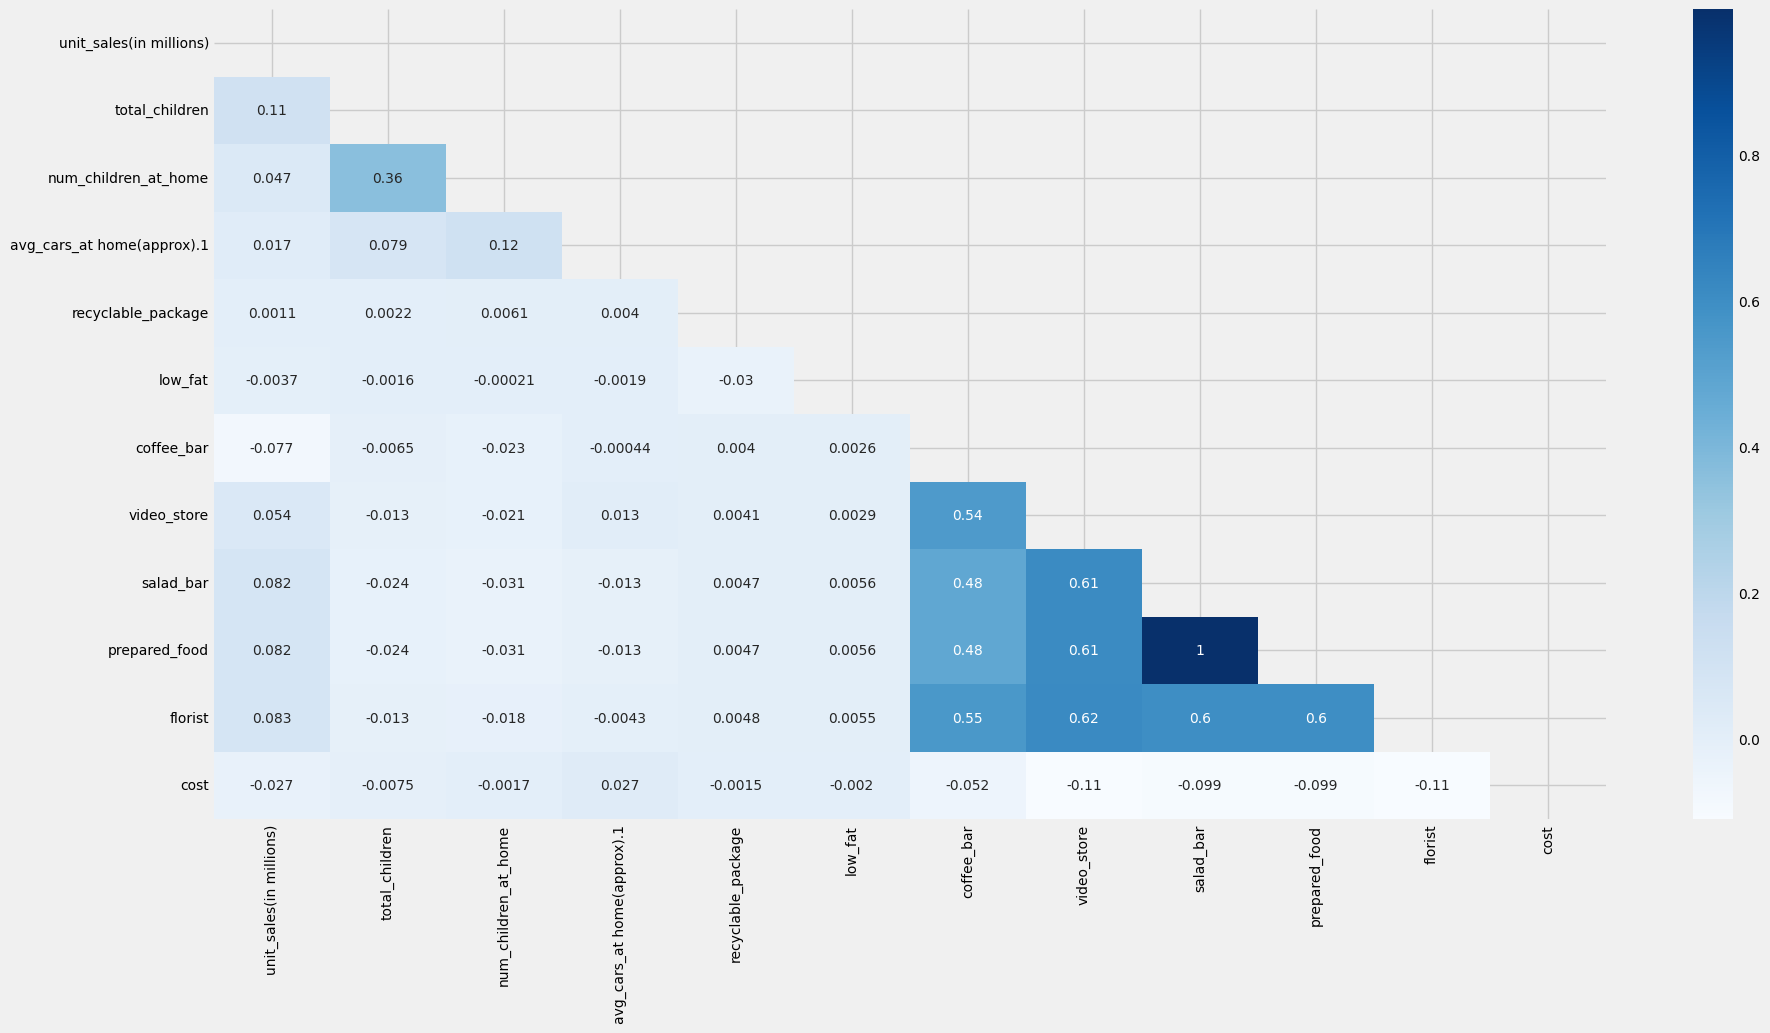

In [ ]:
plt.figure(figsize=(20,10))

corr_matrix = train[feat].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True # Возвращает индексы для верхнего треугольника

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="Blues") # PiYG
plt.show()

Удалим **prepared_food**, **low_fat**, **recyclable_package**

In [ ]:
cat_features

['unit_sales(in millions)',
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist']

In [ ]:
train.drop(columns=['recyclable_package', 'low_fat', 'prepared_food'], inplace=True)
test.drop(columns=['recyclable_package', 'low_fat', 'prepared_food'], inplace=True)

#### Feature Engineering

Придумаем пару признаков и добавим в наши данные

In [ ]:
def fe(df:pd.DataFrame):

    df['hasChild'] = (df['total_children'] >= 1).astype(np.int8)
    df['avg_unit_price'] = np.round(df['log_store_sales'] / df['unit_sales(in millions)'], 2)
  
    return df

fe(train)
fe(test)

,unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,log_store_sales,hasChild,avg_unit_price
0,4.0,1.0,0.0,2.0,10.80,7.0,20319.0,0.0,0.0,0.0,0.0,2.109000,1,0.53
1,2.0,2.0,2.0,3.0,8.51,4.0,33858.0,1.0,0.0,1.0,1.0,2.066863,1,1.03
2,3.0,0.0,0.0,3.0,8.77,14.0,39696.0,0.0,0.0,1.0,0.0,2.234306,0,0.74
3,2.0,3.0,3.0,2.0,21.90,9.0,23688.0,1.0,1.0,1.0,1.0,1.868721,1,0.93
4,3.0,2.0,0.0,2.0,10.90,11.0,27694.0,1.0,1.0,1.0,1.0,1.757858,1,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,4.0,0.0,0.0,1.0,8.39,16.0,38382.0,0.0,0.0,0.0,0.0,2.261763,0,0.57
240220,2.0,2.0,0.0,4.0,7.88,4.0,30268.0,0.0,0.0,0.0,0.0,1.667707,1,0.83
240221,3.0,0.0,0.0,3.0,11.50,13.0,39696.0,0.0,0.0,1.0,0.0,1.987874,0,0.66
240222,2.0,0.0,0.0,2.0,8.33,8.0,23759.0,1.0,0.0,1.0,1.0,2.190536,0,1.10


## Modelling

Обучим стекинг моделей **CatBoostClassifier** и **XGBClassifier** на 5 фолдах. Разделение данных сделаем с помощью **KFold** из библиотеки **sklearn.model_selection**

In [ ]:
train.head()

,unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,cost,log_store_sales,hasChild,avg_unit_price
0,3.0,2.0,2.0,2.0,10.30,32.0,36509.0,0.0,0.0,0.0,0.0,62.09,2.262804,1,0.75
1,2.0,4.0,0.0,3.0,6.66,1.0,28206.0,1.0,0.0,0.0,0.0,121.80,1.791759,1,0.90
2,4.0,0.0,0.0,3.0,21.30,26.0,21215.0,1.0,0.0,0.0,0.0,83.51,2.713369,0,0.68
3,3.0,5.0,0.0,0.0,14.80,36.0,21215.0,1.0,0.0,0.0,0.0,66.78,1.613430,1,0.54
4,3.0,5.0,0.0,3.0,17.00,20.0,27694.0,1.0,1.0,1.0,1.0,111.51,1.141033,1,0.38


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold
# from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
RANDOM_STATE = 42
N_folds = 5

xgb_params = {'learning_rate': 0.1,
               'objective': 'reg:squarederror',
               'eval_metric' : 'rmse',
               'max_depth' : 10,
               'n_estimators' : 1000,
               'seed': RANDOM_STATE,
               'tree_method' : 'gpu_hist',
               'n_jobs' : -1}

catb_params = {"objective": "RMSE",
               "iterations": 1000,
               'max_depth' : 10,
               "eval_metric": "RMSE",
               "random_seed": RANDOM_STATE,
               'verbose': False,
               'task_type' : 'GPU'}

In [ ]:
FEATURES = [col for col in train.columns if col != 'cost']
TARGET = 'cost'
val_scores = []

kf = KFold(n_splits=N_folds, shuffle=True, random_state=RANDOM_STATE)

for fold, (train_index, test_index) in enumerate(kf.split(train[FEATURES], train[TARGET])):

    print(10 * '=', f'FOLD = {fold + 1}', 10 * '=')
    start_time = time.time()

    X_train, X_valid = train.iloc[train_index][FEATURES], train.iloc[test_index][FEATURES]
    y_train, y_valid = train[TARGET].iloc[train_index], train[TARGET].iloc[test_index]

    model = StackingRegressor([('xgb', XGBRegressor(**xgb_params)), 
                                ('catb', CatBoostRegressor(**catb_params))
                                ])
    # 'lgbm', LGBMRegressor(**lgbm_params)
    model.fit(X_train, y_train)
 
    preds = model.predict(X_valid)
    
    val_score = mse(y_valid, preds, squared=False) # If True returns MSE value, if False returns RMSE value
    val_scores.append(val_score)

    run_time = time.time() - start_time
    print(f'FOLD = {fold + 1}, RMSE = {val_score:.2f}, TIME = {run_time:.2f}s')
    
print(30*'=')
print(f'Mean RMSE: {np.mean(val_scores):.2f}')


========== FOLD = 1 ==========
FOLD = 0, RMSE = 28.38, TIME = 168.84s
========== FOLD = 2 ==========
FOLD = 1, RMSE = 28.22, TIME = 174.33s
========== FOLD = 3 ==========
FOLD = 2, RMSE = 28.35, TIME = 166.32s
========== FOLD = 4 ==========
FOLD = 3, RMSE = 28.33, TIME = 180.28s
========== FOLD = 5 ==========
FOLD = 4, RMSE = 28.41, TIME = 175.17s
Mean RMSE: 28.34


In [ ]:
test_pred = model.predict(test)
test_pred

array([ 95.42800181,  92.0436296 ,  94.08628733, ..., 102.26500775,
       117.86459092, 109.74490356])

## Submission

In [ ]:
stack_submission = submission.copy()
stack_submission[TARGET] =test_pred
stack_submission.to_csv("stack-subs_v1.csv",index=False)
stack_submission.head()

,id,cost
0,360336,95.428002
1,360337,92.043630
2,360338,94.086287
3,360339,107.056006
4,360340,84.381640


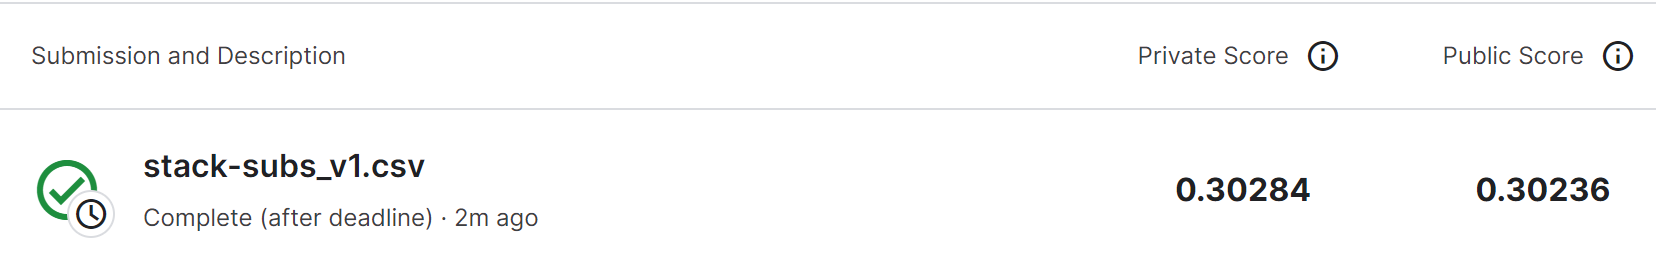